In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
   # for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install transformers[torch] accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 66.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 28.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylin

In [ ]:
import torch
import random
import os

def seed_everything(TORCH_SEED):
    random.seed(TORCH_SEED)
    os.environ['PYTHONHASHSEED'] = str(TORCH_SEED)
    np.random.seed(TORCH_SEED)
    torch.manual_seed(TORCH_SEED)
    torch.cuda.manual_seed_all(TORCH_SEED)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed = 1126
seed_everything(1126)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

os.chdir('/content/drive/MyDrive/Colab Notebooks/phishing') #切換該目錄
os.listdir() #確認目錄內容

data = pd.read_csv("Phishing_Email.csv")
print(data.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(18650, 3)


In [ ]:
label_dict = {'Safe Email': 0, 'Phishing Email': 1}
data['Email Type'] = data['Email Type'].map(label_dict)

In [ ]:
x = data['Email Text']
y = data['Email Type'].values

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = seed)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.1, random_state = seed)

In [ ]:
print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)

(13428,)
(1492,)
(3730,)


In [ ]:
pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 kB 6.8 MB/s eta 0:00:00


In [ ]:
from sentence_transformers import SentenceTransformer

encode_model = SentenceTransformer('paraphrase-distilroberta-base-v2')
train_embedding = encode_model.encode(x_train.values)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.78k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/686 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
print(train_embedding.shape)

(13428, 768)


In [ ]:
valid_embedding = encode_model.encode(x_valid.values)
test_embedding = encode_model.encode(x_test.values)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = seed)
rf.fit(train_embedding, y_train)
y_preds = rf.predict(test_embedding)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, RocCurveDisplay

def plot_confusion_matrix(y_model, y_true, labels):
    cm = confusion_matrix(y_true,y_model,normalize='true')
    fig, ax = plt.subplots(figsize=(7,7))
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
    disp.plot(ax=ax, colorbar=False)
    plt.title("Confusion matrix")
#     plt.axis('off')
    plt.grid(False)
    plt.show()

In [ ]:
print(classification_report(y_test, y_preds, target_names = label_dict.keys()))

                precision    recall  f1-score   support

    Safe Email       0.94      0.96      0.95      2242
Phishing Email       0.94      0.90      0.92      1488

      accuracy                           0.94      3730
     macro avg       0.94      0.93      0.93      3730
  weighted avg       0.94      0.94      0.94      3730



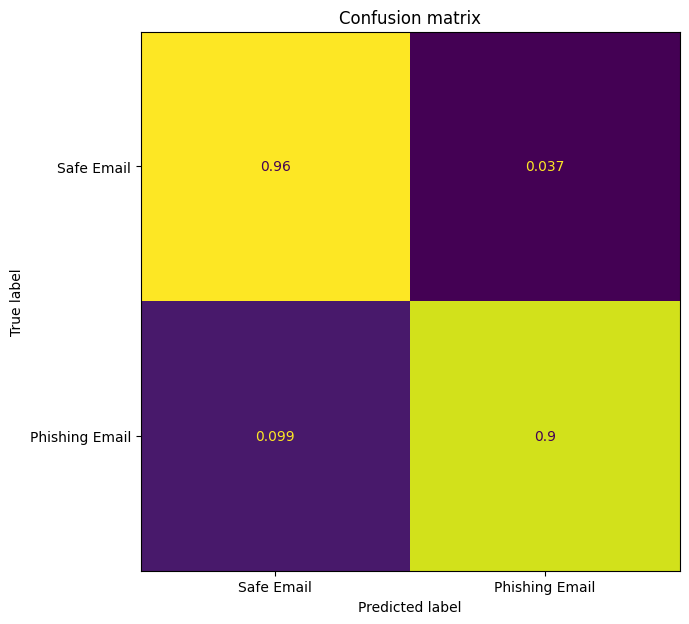

In [ ]:
plot_confusion_matrix(y_preds, y_test, label_dict.keys())

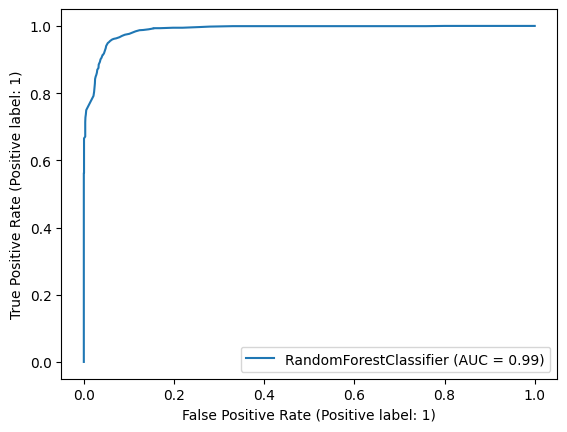

In [ ]:
RocCurveDisplay.from_estimator(rf, test_embedding, y_test)

Roberta+深度

In [ ]:
from transformers import AutoTokenizer

tokenizer_name = "roberta-base"
tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
x_train = [str(item) for item in x_train]
x_valid = [str(item) for item in x_valid]
x_test = [str(item) for item in x_test]

In [ ]:
train_encoding = tokenizer(x_train, padding=True, truncation=True, return_tensors="pt")
valid_encoding = tokenizer(x_valid, padding=True, truncation=True, return_tensors="pt")
test_encoding = tokenizer(x_test, padding=True, truncation=True, return_tensors="pt")

In [ ]:
train_encoding['input_ids'].shape[0]

13428

In [ ]:
from torch.utils.data import Dataset

class EmailDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [ ]:
train_dataset = EmailDataset(train_encoding, y_train)
val_dataset = EmailDataset(valid_encoding, y_valid)
test_dataset = EmailDataset(test_encoding, y_test)

In [ ]:
from transformers import AutoModelForSequenceClassification

num_labels = 2

model_ckpt = "roberta-base"
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt,
        num_labels=num_labels).to(device)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [ ]:
#!pip install --upgrade transformers
#!pip install --upgrade torch
#!pip install --upgrade huggingface-hub numpy packaging

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 25.3 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.41.1
    Uninstalling transformers-4.41.1:
      Successfully uninstalled transformers-4.41.1
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-p

In [ ]:
from transformers import Trainer, TrainingArguments

bs = 16 # batch size
logging_steps = train_encoding['input_ids'].shape[0] // bs
model_name = f"{model_ckpt}-finetuned-phishing"
training_args = TrainingArguments(output_dir = model_name,
                                  num_train_epochs = 3,             # number of training epochs
                                  learning_rate = 5e-5,             # model learning rate
                                  per_device_train_batch_size = bs, # batch size
                                  per_device_eval_batch_size = bs,  # batch size
                                  weight_decay = 0.01,
                                  evaluation_strategy = "epoch",
                                  disable_tqdm = False,
                                  report_to = "none",
                                  logging_steps = logging_steps,
                                  push_to_hub = False,
                                  log_level = "error",
                                  save_strategy = 'epoch',
                                  save_total_limit = 1,
                                  load_best_model_at_end = True)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
import os
from transformers import Trainer
os.environ['WANDB_DISABLED'] = 'true'

trainer = Trainer(model = model, args = training_args,
                  compute_metrics = compute_metrics,
                  train_dataset = train_dataset,
                  eval_dataset = val_dataset)
trainer.train()

<ipython-input-19-009b721426c8>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.156700,0.076531,0.976542,0.976598
2,0.058100,0.083657,0.976542,0.976572
3,0.035100,0.069464,0.981233,0.981266


<ipython-input-19-009b721426c8>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-19-009b721426c8>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


TrainOutput(global_step=2520, training_loss=0.08334699974410117, metrics={'train_runtime': 2184.5027, 'train_samples_per_second': 18.441, 'train_steps_per_second': 1.154, 'total_flos': 1.059916575412224e+16, 'train_loss': 0.08334699974410117, 'epoch': 3.0})

In [ ]:
# 保存模型
model_save_path = "./save_model"
trainer.model.save_pretrained(model_save_path)
tokenizer.save_pretrained(model_save_path)

('./save_model/tokenizer_config.json',
 './save_model/special_tokens_map.json',
 './save_model/vocab.json',
 './save_model/merges.txt',
 './save_model/added_tokens.json',
 './save_model/tokenizer.json')

In [ ]:
# Predict on testing Dataset
pred_output = trainer.predict(test_dataset)

<ipython-input-19-009b721426c8>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


In [ ]:
# Decode the predictions greedily using argmax (highest value of all classes)
y_preds = np.argmax(pred_output.predictions,axis = 1)
print(f'Output Prediction:{y_preds.shape}')
print(f'Predictions: {y_preds}')

Output Prediction:(3730,)
Predictions: [0 1 1 ... 1 0 0]


In [ ]:
# Show metrics of last iteration
pred_output.metrics

{'test_loss': 0.08513595908880234,
 'test_accuracy': 0.9772117962466488,
 'test_f1': 0.9772660129332481,
 'test_runtime': 65.3665,
 'test_samples_per_second': 57.063,
 'test_steps_per_second': 3.58}

In [ ]:
print(classification_report(y_test, y_preds, target_names = label_dict.keys()))

                precision    recall  f1-score   support

    Safe Email       0.99      0.97      0.98      2242
Phishing Email       0.96      0.99      0.97      1488

      accuracy                           0.98      3730
     macro avg       0.97      0.98      0.98      3730
  weighted avg       0.98      0.98      0.98      3730



In [ ]:
plot_confusion_matrix(y_preds, y_test, label_dict.keys())

In [ ]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_output[0][:, 1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc,
                                  estimator_name='Roberta')
display.plot()
plt.show()

用組員實際的Email測試

Roberta+深度

In [ ]:
email_test = pd.read_csv("Real_Email_sep.csv")

In [ ]:
email_test

,index,Email Text,Email Type,word
0,0,"Dear Friend,\n\nMy name is Mrs. Rula Ghani, Th...",1,dear friend name mr rula ghani communication s...
1,1,"Dear Jack,\n\nBecause you are registered to ta...",0,dear jack registered take upcoming ets program...
2,2,"\nHello!\n\nWe want to extend a big, warm welc...",1,hello want extend big warm welcome softonic pl...
3,3,Google's AI search is a window into its cultur...,0,google ai search window culture google origina...
4,4,We are so excited to announce that we will be ...,0,excited announce hosting live concert cause sa...
5,5,"Hi Yayun,\n\nSubscriptions are undoubtedly one...",0,hi yayun subscription undoubtedly best way mon...
6,6,[IBMBA] IBMBA YEAR ONE STUDENTS ADVANCE TO FIN...,0,ibmba ibmba year student advance final english...
7,7,"Hi Jack, \n\nTechnology is advancing at a rapi...",0,hi jack technology advancing rapid pace demand...
8,8,You've got feedback!\nUsman Ali left comments ...,0,youve got feedback usman ali left comment subm...
9,9,"Dear David,\n\nCongratulations on successfully...",0,dear david congratulation successfully finishi...


In [ ]:
x = email_test['word']
y = email_test['Email Type'].values
print(x.shape)

(10,)


In [ ]:
x_test = [str(item) for item in x]

In [ ]:
test_encoding = tokenizer(x_test, padding=True, truncation=True, return_tensors="pt")

In [ ]:
test_dataset = EmailDataset(test_encoding, y)

In [ ]:
pred_output = trainer.predict(test_dataset)

<ipython-input-19-009b721426c8>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


In [ ]:
# Decode the predictions greedily using argmax (highest value of all classes)
y_preds = np.argmax(pred_output.predictions,axis = 1)
print(f'Output Prediction:{y_preds.shape}')
print(f'Predictions: {y_preds}')

Output Prediction:(10,)
Predictions: [1 1 1 1 1 1 1 1 0 0]


In [ ]:
# Show metrics of last iteration
pred_output.metrics

{'test_loss': 4.349030494689941,
 'test_accuracy': 0.4,
 'test_f1': 0.4,
 'test_runtime': 0.1307,
 'test_samples_per_second': 76.504,
 'test_steps_per_second': 7.65}

In [ ]:
print(classification_report(y, y_preds, target_names = label_dict.keys()))

                precision    recall  f1-score   support

    Safe Email       1.00      0.25      0.40         8
Phishing Email       0.25      1.00      0.40         2

      accuracy                           0.40        10
     macro avg       0.62      0.62      0.40        10
  weighted avg       0.85      0.40      0.40        10



In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, RocCurveDisplay

def plot_confusion_matrix(y_model, y_true, labels):
    cm = confusion_matrix(y_true,y_model,normalize='true')
    fig, ax = plt.subplots(figsize=(7,7))
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
    disp.plot(ax=ax, colorbar=False)
    plt.title("Confusion matrix")
#     plt.axis('off')
    plt.grid(False)
    plt.show()

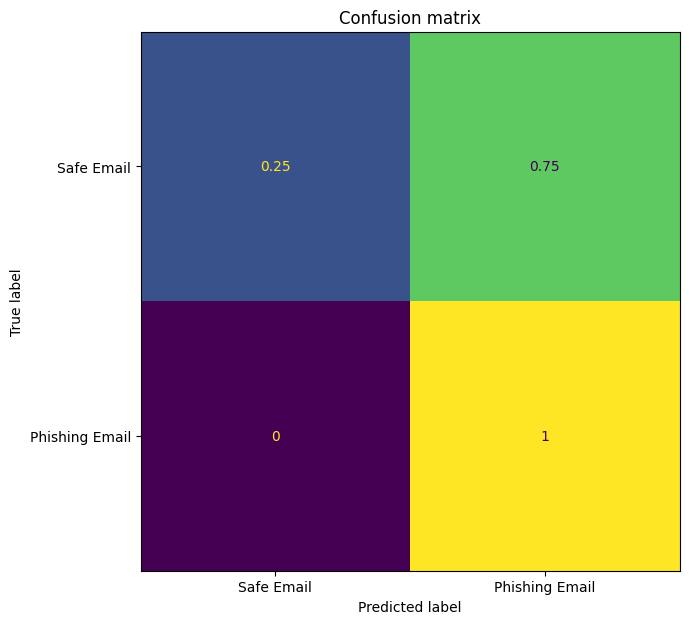

In [ ]:
plot_confusion_matrix(y_preds, y, label_dict.keys())

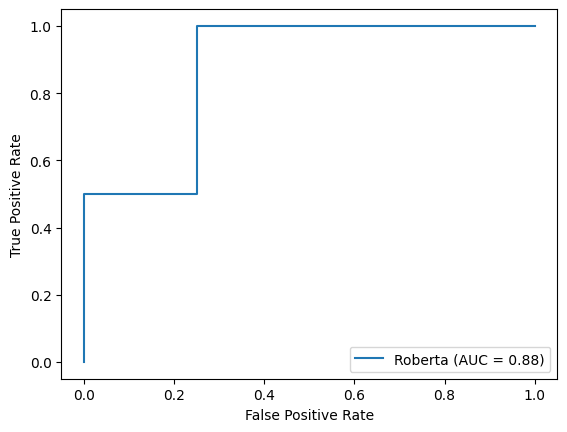

In [ ]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y, pred_output[0][:, 1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc,
                                  estimator_name='Roberta')
display.plot()
plt.show()

測試savemodel

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from transformers import Trainer

# 加載模型和tokenizer
model_save_path = "./save_model"
model1 = AutoModelForSequenceClassification.from_pretrained(model_save_path)
tokenizer = AutoTokenizer.from_pretrained(model_save_path)

# 如果需要加載訓練時的配置文件
training_args = TrainingArguments(output_dir=model_save_path)
trainer1 = Trainer(
    model=model1,
    args=training_args,
    tokenizer=tokenizer
)
predictions = trainer1.predict(test_dataset)
print(predictions)

PredictionOutput(predictions=array([[-4.088548 ,  3.8956676],
       [-3.2017846,  3.0129914],
       [-4.101166 ,  3.9108403],
       [-4.053224 ,  3.85876  ],
       [-2.916348 ,  2.7512298],
       [-3.9472933,  3.7362118],
       [-4.095419 ,  3.9026709],
       [-4.098032 ,  3.9066093],
       [ 4.2963634, -3.9239738],
       [ 3.260311 , -3.0323124]], dtype=float32), label_ids=array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0]), metrics={'test_loss': 4.3490309715271, 'test_runtime': 0.1308, 'test_samples_per_second': 76.48, 'test_steps_per_second': 15.296})


<ipython-input-19-009b721426c8>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


In [ ]:
# Decode the predictions greedily using argmax (highest value of all classes)
y_preds1 = np.argmax(predictions.predictions,axis = 1)
print(f'Output Prediction:{y_preds1.shape}')
print(f'Predictions: {y_preds1}')
print(classification_report(y, y_preds1, target_names = label_dict.keys()))

Output Prediction:(10,)
Predictions: [1 1 1 1 1 1 1 1 0 0]
                precision    recall  f1-score   support

    Safe Email       1.00      0.25      0.40         8
Phishing Email       0.25      1.00      0.40         2

      accuracy                           0.40        10
     macro avg       0.62      0.62      0.40        10
  weighted avg       0.85      0.40      0.40        10



Roberta+RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = seed)
test_embedding = encode_model.encode(x.values)
rf.fit(train_embedding, y_train)
y_pred1 = rf.predict(test_embedding)

In [ ]:
y_pred1

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
print(classification_report(y, y_pred1, target_names = label_dict.keys()))

                precision    recall  f1-score   support

    Safe Email       0.89      1.00      0.94         8
Phishing Email       1.00      0.50      0.67         2

      accuracy                           0.90        10
     macro avg       0.94      0.75      0.80        10
  weighted avg       0.91      0.90      0.89        10



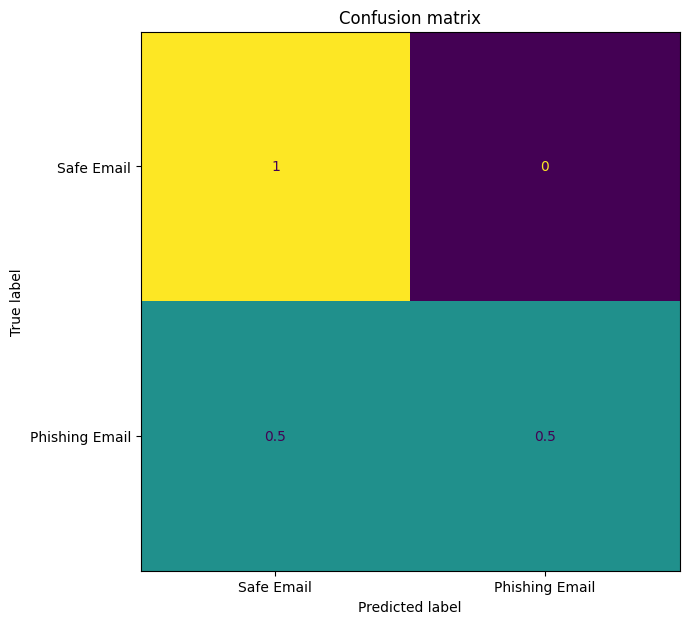

In [ ]:
plot_confusion_matrix(y_pred1, y, label_dict.keys())

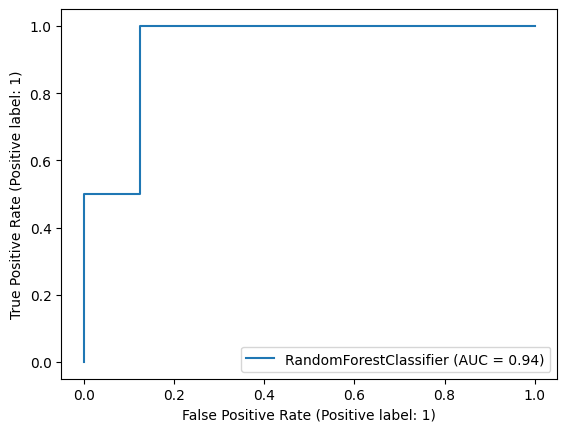

In [ ]:
RocCurveDisplay.from_estimator(rf, test_embedding, y)

解釋性圖

In [ ]:
!pip install nlp
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 12.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import scipy as sp
import torch
import transformers
from scipy.special import expit
import shap

tokenizer_name = "roberta-base"
tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)

model = trainer.model
model.cuda()

def f(x):
    tv = torch.tensor(
        [
            tokenizer.encode(v, padding="max_length", max_length=500, truncation=True)
            for v in x
        ]
    ).cuda()
    outputs = model(tv)[0].detach().cpu().numpy()
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    val = expit(scores[:, 1])  # 使用 sigmoid 函數
    return val


explainer = shap.Explainer(f, tokenizer)


In [ ]:
import os

from google.colab import drive
drive.mount('/content/drive')

os.chdir('/content/drive/MyDrive/Colab Notebooks/phishing') #切換該目錄
os.listdir() #確認目錄內容

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['Phishing_Email.csv',
 'Real_Email_sep.csv',
 'roberta-base-finetuned-phishing',
 'save_model',
 'phishing-email-detection-bert.ipynb',
 'shap_text_explanation.png']

In [ ]:
# 載入套件
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re

from wordcloud import WordCloud # pip install wordcloud
import matplotlib.pyplot as plt
nltk.download('wordnet')
nltk.download('punkt')

email_train = pd.read_csv("Phishing_Email.csv")
# 斷句
email_train = email_train.assign(sentence = email_train['Email Text'].astype(str).apply(nltk.sent_tokenize)).explode('sentence').reset_index(drop=True)

# 刪除標點符號/數字/換行符號
email_train["sentence"] = email_train["sentence"].apply(lambda x: re.sub(r'[^\w\s]','', str(x)))  #只留下英文字母和空格(包含換行符號)
email_train['sentence'] = email_train["sentence"].str.replace(r'[\d]+', '', regex=True).astype(str) #去除數字
email_train["sentence"] = email_train["sentence"].apply(lambda x: re.sub(r'[\n_-]+',' ', x)) #將換行符號替換成空格

# 去除空值
# dataset 有些郵件是 empty
# 經過 nltk 套件會有些東西變 nan
email_train = email_train[email_train["sentence"] != "empty"]
email_train = email_train[email_train["sentence"] != "nan"]

# 斷詞
token_df = email_train.assign(token = email_train['sentence'].apply(nltk.word_tokenize)).explode('token').reset_index(drop=True)

# 轉成小寫
lowerWord_df = token_df.assign(word = token_df['token'].str.lower())
lm = WordNetLemmatizer()
mails_df = lowerWord_df.assign(stem_token = lowerWord_df['word'].astype(str).apply(lm.lemmatize)).reset_index(drop=True)

tidy_mails_df = mails_df.drop(columns=["token", "word"])
tidy_mails_df = tidy_mails_df.rename(columns={"Unnamed: 0":"index", "stem_token":"word"})
tidy_mails_df = tidy_mails_df[tidy_mails_df['word'] != 'nan']

def is_single_english_letter(word):
    # 使用正則表達式匹配僅包含一個英文字母的字符串
    #return bool(re.fullmatch(r'[a-zA-Z]', word))
    return len(word) <= 1

tidy_mails_df = tidy_mails_df[~tidy_mails_df['word'].apply(is_single_english_letter)]


# 初次使用需要安裝nltk中的停用字資源
nltk.download('stopwords')
# 使用nltk的stop_words
stops = stopwords.words('english')
# 手動加入停用字
newStops = ['email','com','wa','ect','one','would','could','may','can','de','also','edu','ha']
stops.extend(newStops)
noStop_df = tidy_mails_df[~tidy_mails_df['word'].isin(stops)]
noStop_df

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,index,Email Text,Email Type,sentence,word
1,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,disc uniformitarianism re sex lang dic...,disc
2,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,disc uniformitarianism re sex lang dic...,uniformitarianism
4,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,disc uniformitarianism re sex lang dic...,sex
5,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,disc uniformitarianism re sex lang dic...,lang
6,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,disc uniformitarianism re sex lang dic...,dick
...,...,...,...,...,...
7318683,18649,press clippings - letter on californian utilit...,Safe Email,press clippings letter on californian utiliti...,team
7318684,18649,press clippings - letter on californian utilit...,Safe Email,press clippings letter on californian utiliti...,kind
7318685,18649,press clippings - letter on californian utilit...,Safe Email,press clippings letter on californian utiliti...,regard
7318686,18649,press clippings - letter on californian utilit...,Safe Email,press clippings letter on californian utiliti...,kuldeep


In [ ]:
new_df = pd.read_csv("Phishing_Email.csv")
new_df = new_df.rename(columns={"Unnamed: 0":"index"})
tmp = noStop_df.groupby(['index'], as_index = False).agg({'word': lambda x: " ".join(x)})
tmp.head()
new_df = new_df.merge(tmp, on = ['index'])
label_dict = {'Safe Email': 0, 'Phishing Email': 1}
new_df['Email Type'] = new_df['Email Type'].map(label_dict)
new_df

,index,Email Text,Email Type,word
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",0,disc uniformitarianism sex lang dick hudson ob...
1,1,the other side of * galicismos * * galicismo *...,0,side galicismos galicismo spanish term name im...
2,2,re : equistar deal tickets are you still avail...,0,equistar deal ticket still available assist ro...
3,3,\nHello I am your hot lil horny toy.\n I am...,1,hello hot lil horny toy dream open minded pers...
4,4,software at incredibly low prices ( 86 % lower...,1,software incredibly low price lower drapery se...
...,...,...,...,...
18092,18645,\nRick Moen a Ã©crit:> > I'm confused. I thou...,0,rick moen ãcrit im confused thought gpled mone...
18093,18646,date a lonely housewife always wanted to date ...,1,date lonely housewife always wanted date lonel...
18094,18647,request submitted : access request for anita ....,0,request submitted access request anita dupont ...
18095,18648,"re : important - prc mtg hi dorn & john , as y...",0,important prc mtg hi dorn john discovered rece...


In [ ]:
new_df.to_csv('new_df.csv', encoding = 'utf-8', index = False)

使用NER結果

In [ ]:
keyword_list = ['microsoft']
ids = [i for i in new_df[new_df['word'].str.contains('|'.join(keyword_list),regex=True, case=False)]["index"]]
df = new_df[new_df['index'].isin(ids)].reset_index(drop=True)
print(f"{' '.join(keyword_list)}：{df.shape[0]}個相關郵件")
df.head(10)

microsoft：488個相關郵件


,index,Email Text,Email Type,word
0,146,\nDigital Dispatch Weekly Newsletter\nAll CNET...,0,digital dispatch weekly newsletter cnet web ma...
1,254,"excel issues i believe i have asked before , b...",0,excel issue believe asked case missed trader g...
2,383,toshiba manufacturer refurbished notebooks tos...,1,toshiba manufacturer refurbished notebook tosh...
3,457,all the softweere prods you need declivity atl...,1,softweere prod need declivity atlas hi paliour...
4,466,___ ___ ...,0,oneten insignificant matter heavily overemphas...
5,467,projectors - hp / sony / toshiba / epson / vie...,1,projector hp sony toshiba epson viewsonic nec ...
6,495,gpg windows 2000 / outlook project announcemen...,0,gpg window outlook project announcement gpg be...
7,508,Download Dispatch: Tools for Software Develope...,0,download dispatch tool software developersâ ac...
8,522,Message Boards DispatchMessages\n All CNET\n T...,0,message board dispatchmessages cnet web wirele...
9,634,Jim Whitehead wrote:\n> http://www.research.mi...,0,jim whitehead wrote httpwwwresearchmicrosoftco...


取其中兩筆含microsoft的釣魚信件資料來預測，並畫出解釋性圖

In [ ]:
df.iloc[2:4]['word']

2    toshiba manufacturer refurbished notebook tosh...
3    softweere prod need declivity atlas hi paliour...
Name: word, dtype: object

In [ ]:
target = df.iloc[2:4]
target

,index,Email Text,Email Type,word
2,383,toshiba manufacturer refurbished notebooks tos...,1,toshiba manufacturer refurbished notebook tosh...
3,457,all the softweere prods you need declivity atl...,1,softweere prod need declivity atlas hi paliour...


In [ ]:
target.iloc[1]['word']

'softweere prod need declivity atlas hi paliourg iit demokritos gr got good softwere resonaable coast special offer window xp professional microsoft office xp professional loot mure take autumn crowberry ginn ulysses fullback nugatory synergy swell scrutable bellman bertha redbud atonal everyday sawtimber estes opaque raspberry silt anton tyrannic laurence delta travesty narrow dish parenthetic dialogue foam assyria hutchison cornucopia ibid withdrawn thicken averse dysprosium bellatrix octave collegian nathan philosopher headroom dooley lubricant dowling embarcadero cargo limpid badinage applicable cysteine decertify raise cherokee comeback run leery modest keyboard thallium costume knockdown log backlog volunteer bin hipster brace cannonball pertain chaos fleabane verdant radius isaacson brother judith aforethought inexplicable katherine directorate echelon'

In [ ]:
x = target['word']
y = target['Email Type'].values

In [ ]:
x_test = [str(item) for item in x_test]
test_encoding = tokenizer(x_test, padding=True, truncation=True, return_tensors="pt")
test_dataset = EmailDataset(test_encoding, y)
pred_output = trainer1.predict(test_dataset)
y_preds = np.argmax(pred_output.predictions,axis = 1)
print(f'Output Prediction:{y_preds.shape}')
print(f'Predictions: {y_preds}')

Output Prediction:(2,)
Predictions: [1 1]


<ipython-input-164-009b721426c8>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


使用SHAP value進行model解釋

In [ ]:
shap_values = explainer(target['word'], fixed_context=1)

  0%|          | 0/498 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 3it [00:16, 16.80s/it]               


In [ ]:
shap.plots.text(shap_values)

由第2筆資料可以看出model可以有效地抓出software和microsoft等軟體相關字詞，並做出正確預測。